## First steps

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [191]:
df0 = pd.read_csv("customer_shopping_data.csv")

In [192]:
df0.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [193]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


## Date formatting

In [194]:
df1 = df0.copy()
# Changing the date format from %d/%m/%Y to %Y-%m-%d
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d/%m/%Y')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [195]:
df1.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


In [196]:
#Adding a column to sort by year
df1['year'] = df1['invoice_date'].dt.year

df1.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021


In [197]:
#Adding a column to sort by month
df1['month'] = df1['invoice_date'].dt.month

df1.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,2021,5
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2021,10


## Buy rate by gender

In [198]:
#Checking if every id is different
df0['customer_id'].nunique()

99457

In [199]:
dfm = df0[df0['gender'] == "Male"]
print('The number of transactions made by men is', dfm.shape[0], 'transactions')

The number of transactions made by men is 39975 transactions


In [200]:
dff = df0[df0['gender'] == "Female"]
print('The number of transactions made by women is', dff.shape[0], 'transactions')

The number of transactions made by women is 59482 transactions


In [201]:
# Checking the percentages
porc_m = dfm.shape[0]/df0.shape[0]*100
porc_f = dff.shape[0]/df0.shape[0]*100

print('Percentage of transactions by women: ', round(porc_f, 2), '%')
print('Percentage of transactions by men: ', round(porc_m, 2), '%')

Percentage of transactions by women:  59.81 %
Percentage of transactions by men:  40.19 %


Text(0.5, 1.0, 'Percentage of transactions')

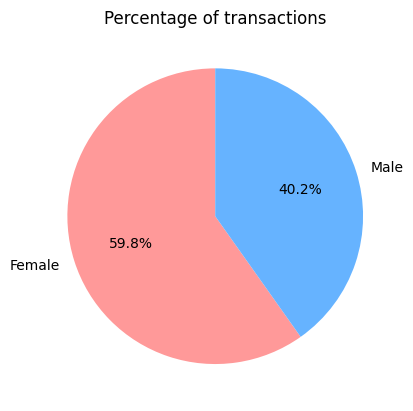

In [202]:
df1 = df0.copy()
category_counts = df1['gender'].value_counts() 

# Define colors for each category slice
colors = ['#ff9999','#66b3ff'] 

# Create the pie chart
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Add title and show the chart
plt.title('Percentage of transactions')


[Text(0.5, 1.0, 'Gender Count')]

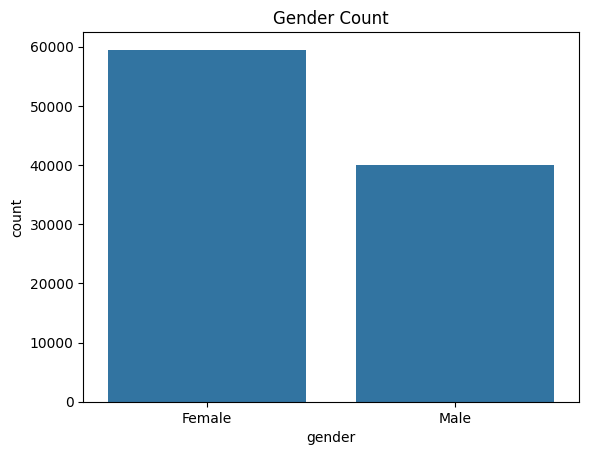

In [203]:
sns.countplot(data=df1, x='gender').set(title='Gender Count')


In [204]:
#Women to men ratio
print(round(porc_f/porc_m,2))

1.49


Conclusions: 
<br> -  There is a 40 to 60 percent ratio of men vs female clients, meaning there is almost 50% more female customers over male customers
<br> -  This does not account for money expent per client


## Age Groups

### Transactions by age group

In [205]:
df2 = df1.copy()

In [206]:
df2['AgeGroup'] =df2['age']
df2.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,AgeGroup
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,28
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,21
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,20
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,66
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,53


In [207]:
def AgeGroup(age):
    if age < 26:
        return "18-25"
    elif (age >= 26) and (age < 36):
        return "26-35"
    elif (age >= 36) and (age < 46):
        return "36-45"
    elif (age >= 46) and (age < 56):
        return "46-55"
    elif (age >= 56) and (age < 66):
        return "56-65"
    else:
        return "65+"

In [208]:
df2['AgeGroup'] = df2['AgeGroup'].apply(AgeGroup)
df2.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,AgeGroup
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,26-35
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,18-25
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,18-25
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,65+
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,46-55


Text(0.5, 1.0, 'Percentage of transactions per age group')

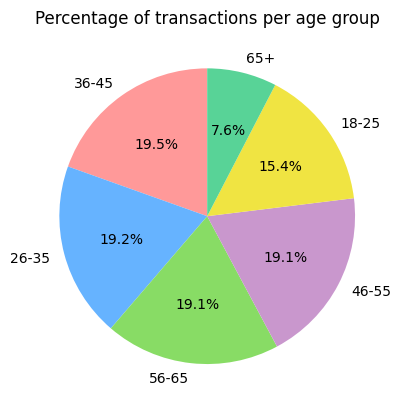

In [209]:
Trans_age = df2['AgeGroup'].value_counts() 

# Define colors for each category slice
colors = ['#ff9999','#66b3ff', '#88DC65', '#C997CD', '#F0E442', '#58D397']

# Create the pie chart
plt.pie(Trans_age, labels=Trans_age.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Add title and show the chart
plt.title('Percentage of transactions per age group')

Conclusions:
<br> Most transactions are made by people from 36 to 46 yeards old. However, the difference with other age groups is negligible
<br> Considering negligible differences, there is even distribution between 26 to 65 yeards old. The only groups not even are the very young adults (18-25) and the elderly (+65)
<br> Further studies for average expent are needed

### Total expent per age group

In [210]:
df2['TotalPrice'] = df2['quantity'] * df2['price']
df2.head(10)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,AgeGroup,TotalPrice
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,26-35,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,18-25,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,18-25,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,65+,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,46-55,242.40
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul,26-35,7502.00
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park,46-55,40.66
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,13/01/2021,Mall of Istanbul,26-35,1200.32
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity,65+,2700.72
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,22/08/2021,Kanyon,56-65,1200.32


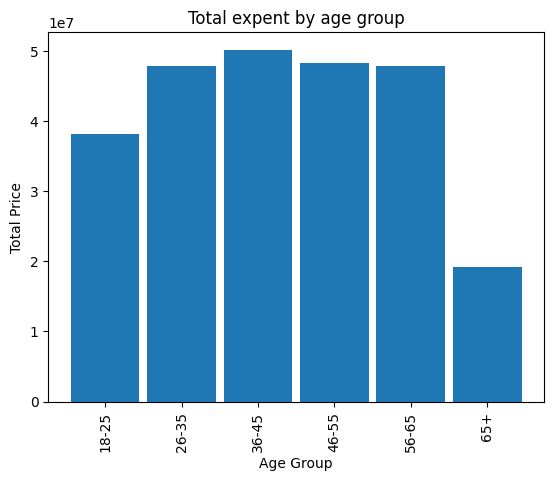

In [211]:
AgeExpent = df2.groupby('AgeGroup')['TotalPrice'].sum().reset_index()

plt.bar(AgeExpent['AgeGroup'], AgeExpent['TotalPrice'], width=0.9)
plt.xlabel('Age Group')
plt.ylabel('Total Price')
plt.title('Total expent by age group')
plt.xticks(rotation=90)
plt.show()

Conclusion:
<br> Most people buy more around the 36-46 age group. Less people buy in here as they get older

### Percentage of transactions by age and gender

In [212]:
df_age_m = df2[df2['gender'] == "Male"]
df_age_f = df2[df2['gender'] == "Female"]
df_age_m

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,AgeGroup,TotalPrice
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,18-25,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,18-25,300.08
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity,65+,2700.72
13,I179802,C312861,Male,25,Clothing,2,600.16,Cash,17/11/2022,Cevahir AVM,18-25,1200.32
15,I688768,C362288,Male,24,Shoes,5,3000.85,Credit Card,7/11/2021,Viaport Outlet,18-25,15004.25
...,...,...,...,...,...,...,...,...,...,...,...,...
99449,I134399,C953724,Male,65,Clothing,1,300.08,Cash,1/1/2023,Kanyon,56-65,300.08
99451,I675411,C513603,Male,50,Toys,5,179.20,Cash,9/10/2021,Metropol AVM,46-55,896.00
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,26-35,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,56-65,20.92


Text(0.5, 1.0, 'Percentage of transaction by age (men)')

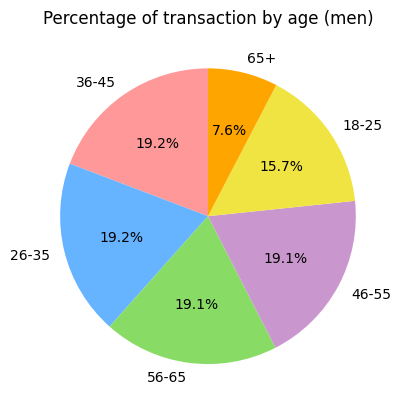

In [213]:
Trans_age_m = df_age_m['AgeGroup'].value_counts() 

# Define colors for each category slice
colors = ['#ff9999','#66b3ff', '#88DC65', '#C997CD', '#F0E442', '#FFA500']

# Create the pie chart
plt.pie(Trans_age_m, labels=Trans_age.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Add title and show the chart
plt.title('Percentage of transaction by age (men)')

Text(0.5, 1.0, 'Percentage of transaction by age (women)')

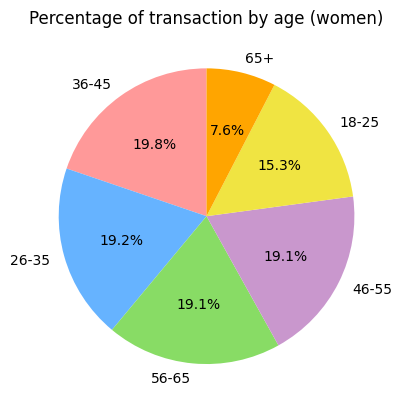

In [214]:
Trans_age_f = df_age_f['AgeGroup'].value_counts() 

# Define colors for each category slice
colors = ['#ff9999','#66b3ff', '#88DC65', '#C997CD', '#F0E442', '#FFA500']

# Create the pie chart
plt.pie(Trans_age_f, labels=Trans_age.index, autopct='%1.1f%%', startangle=90, colors=colors)

# Add title and show the chart
plt.title('Percentage of transaction by age (women)')

Conclusion:
<br >Gender dos not seem to change the buy rate across generations (Not considering total expended), with only the 18-25 and 36-45 groups showing any differences

### Total expended by age and gender

In [215]:
grouped_df = df2.groupby(['AgeGroup', 'gender'])['TotalPrice'].sum().sort_values(ascending=False).reset_index()
grouped_df


,AgeGroup,gender,TotalPrice
0,36-45,Female,30060801.14
1,56-65,Female,29065794.75
2,46-55,Female,28566256.46
3,26-35,Female,28292995.13
4,18-25,Female,23159143.70
5,36-45,Male,20123434.65
6,46-55,Male,19653486.18
7,26-35,Male,19586664.45
8,56-65,Male,18827216.02
9,18-25,Male,14959127.65


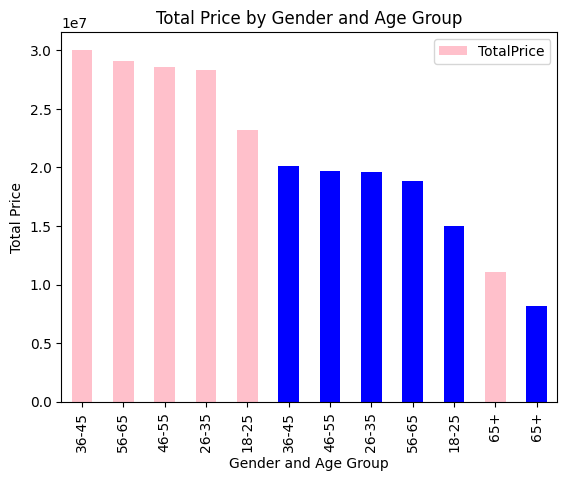

In [216]:
colors = {'Male': 'blue', 'Female': 'pink'}
grouped_df.plot(x='AgeGroup', y='TotalPrice', kind='bar', color =[colors[g] for g in grouped_df['gender']])
plt.title('Total Price by Gender and Age Group')
plt.xlabel('Gender and Age Group')
plt.ylabel('Total Price')
plt.xticks(rotation=90)
plt.show()

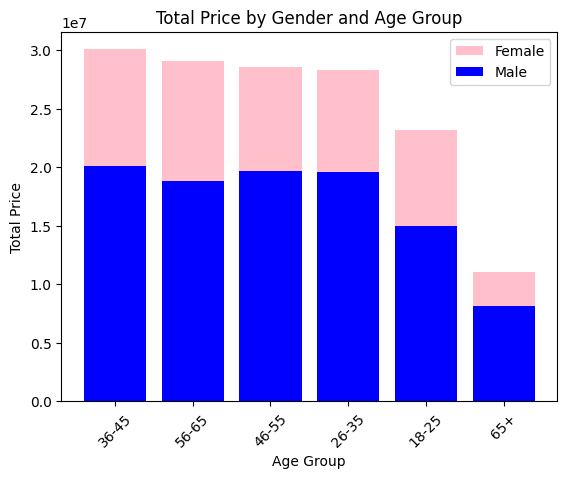

In [217]:
#Other way
colors = {'Male': 'blue', 'Female': 'pink'}

# Create the bar plot
fig, ax = plt.subplots()
for gender, group in grouped_df.groupby('gender'):
    ax.bar(group['AgeGroup'], group['TotalPrice'], label=gender, color=colors[gender], width = 0.8)

plt.title('Total Price by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Price')
plt.xticks(rotation=45)

# Add legend
plt.legend()

plt.show()

Conclusion:
<br> The ammount expent seems to mostly correlate with the number of purchases as the 36-45 age group is still the highest for both men and women
<br> Both men and women seem to follow the trend of money expent per age mostly the same way, with the exeption of the 56-65 age group on men, which is proportionaly lower than on womens

### Histogram

[Text(0.5, 1.0, 'Transaction per age group')]

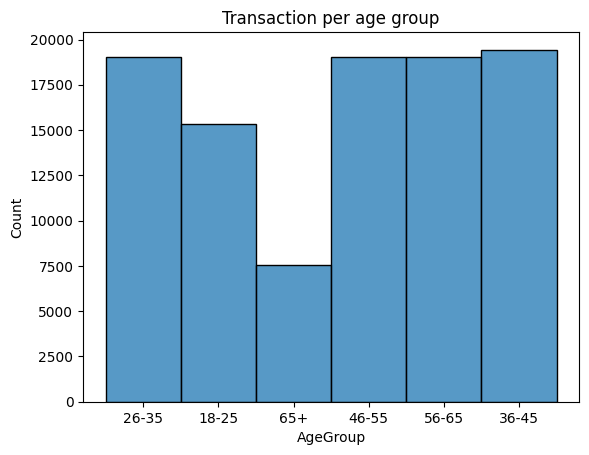

In [218]:
sns.histplot(data=df2, x='AgeGroup').set(title='Transaction per age group')

## Payment methods

### Number of payments made with each method and amount expent

In [219]:

df_methods = df2['payment_method'].value_counts().reset_index()
df_methods

,payment_method,count
0,Cash,44447
1,Credit Card,34931
2,Debit Card,20079


In [220]:
df_methodsPrice = df2.groupby('payment_method')['TotalPrice'].sum().reset_index()
df_methodsPrice['TotalPrice'] = round(df_methodsPrice['TotalPrice'] / 1e6, 2) 
df_methodsPrice

,payment_method,TotalPrice
0,Cash,112.83
1,Credit Card,88.08
2,Debit Card,50.60


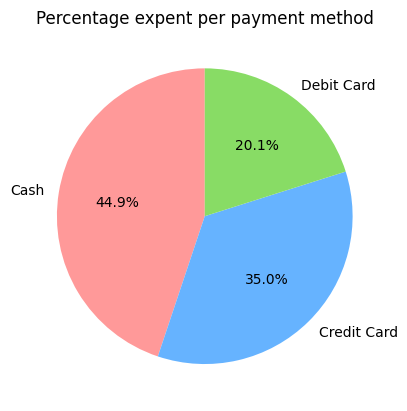

In [221]:
#Percentage plot

# Define colors for each category slice
colors = ['#ff9999','#66b3ff', '#88DC65']

plt.pie(df_methodsPrice['TotalPrice'], labels=df_methodsPrice['payment_method'], autopct='%1.1f%%', startangle=90, colors=colors)

plt.title('Percentage expent per payment method')
plt.show()

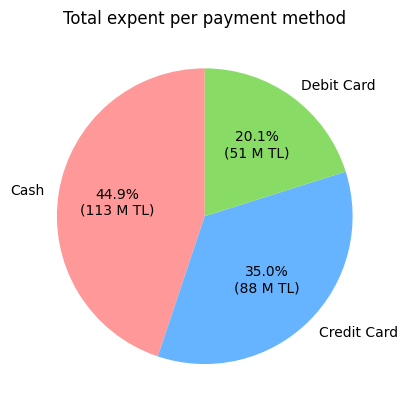

In [222]:
#Added total expent (in millions of TL)

colors = ['#ff9999','#66b3ff', '#88DC65']
# Funcion para darle formato a las etiquetas
def autopct_format(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        exp_val = f"{val} M TL" 
        return f'{pct:.1f}%\n({exp_val})'
    return my_autopct


# Create the pie chart
plt.pie(df_methodsPrice['TotalPrice'], labels=df_methodsPrice['payment_method'], autopct=autopct_format(df_methodsPrice['TotalPrice']), startangle=90, colors=colors)

# Add title and show the chart
plt.title('Total expent per payment method')
plt.show()

Conclusions:
<br> Cash is the most used payment method as well as the method used the pay the most money in total, with almost 45% of all expenses.

# Prefered products

### Divide the df into its categories

In [223]:
df2['price'].describe()

count    99457.000000
mean       689.256321
std        941.184567
min          5.230000
25%         45.450000
50%        203.300000
75%       1200.320000
max       5250.000000
Name: price, dtype: float64

In [224]:
df2['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [225]:
#Amount of transaction per product category and price
df3 = df2.copy()
dfprices = df3.groupby('category')['price'].value_counts().reset_index()
dfprices_Books = dfprices[dfprices['category'] == 'Books']
dfprices_Clothing = dfprices[dfprices['category'] == 'Clothing']
dfprices_Cosmetics = dfprices[dfprices['category'] == 'Cosmetics']
dfprices_Food = dfprices[dfprices['category'] == 'Food & Beverage']
dfprices_Shoes = dfprices[dfprices['category'] == 'Shoes']
dfprices_Tech = dfprices[dfprices['category'] == 'Technology']
dfprices_Toys = dfprices[dfprices['category'] == 'Toys']
dfprices_Souvenirs = dfprices[dfprices['category'] == 'Souvenir']


## Plots by product category

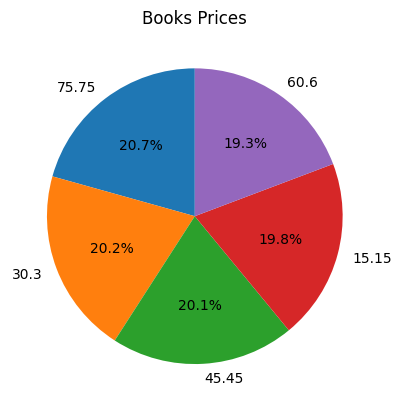

In [226]:
plt.pie(dfprices_Books['count'], labels=dfprices_Books['price'], autopct='%1.1f%%', startangle=90)

plt.title('Books Prices')
plt.show()

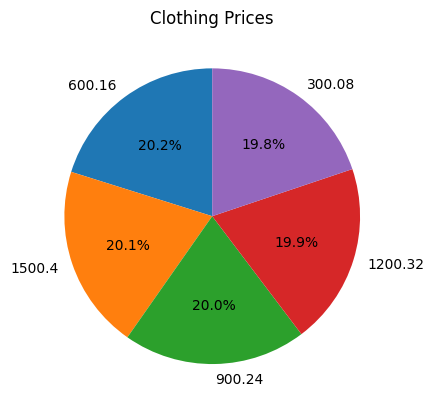

In [227]:
plt.pie(dfprices_Clothing['count'], labels=dfprices_Clothing['price'], autopct='%1.1f%%', startangle=90)

plt.title('Clothing Prices')
plt.show()

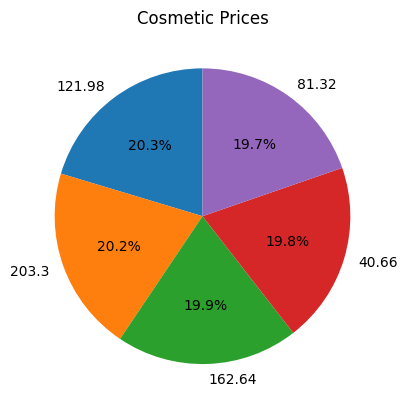

In [228]:
plt.pie(dfprices_Cosmetics['count'], labels=dfprices_Cosmetics['price'], autopct='%1.1f%%', startangle=90)

plt.title('Cosmetic Prices')
plt.show()

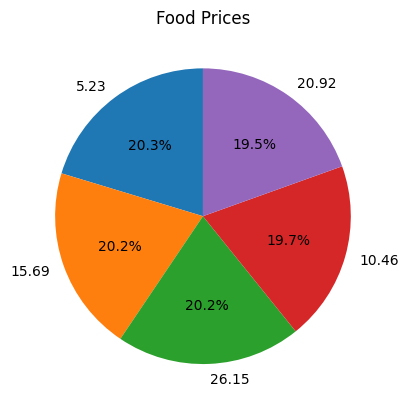

In [229]:
plt.pie(dfprices_Food['count'], labels=dfprices_Food['price'], autopct='%1.1f%%', startangle=90)

plt.title('Food Prices')
plt.show()

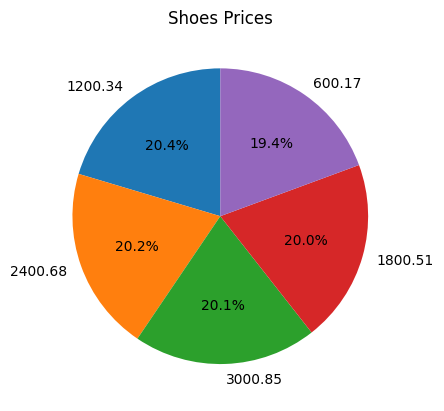

In [230]:
plt.pie(dfprices_Shoes['count'], labels=dfprices_Shoes['price'], autopct='%1.1f%%', startangle=90)

plt.title('Shoes Prices')
plt.show()

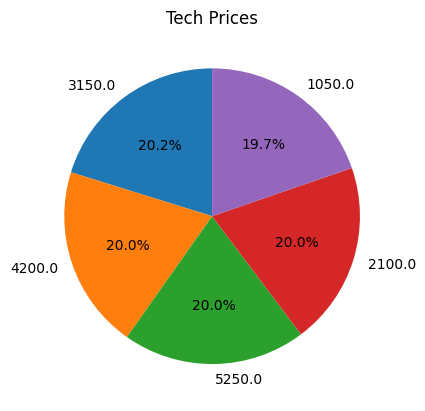

In [231]:
plt.pie(dfprices_Tech['count'], labels=dfprices_Tech['price'], autopct='%1.1f%%', startangle=90)

plt.title('Tech Prices')
plt.show()

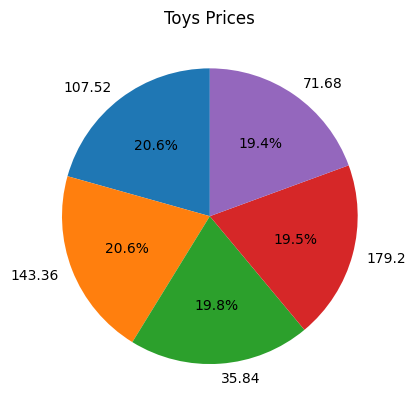

In [232]:
plt.pie(dfprices_Toys['count'], labels=dfprices_Toys['price'], autopct='%1.1f%%', startangle=90)

plt.title('Toys Prices')
plt.show()

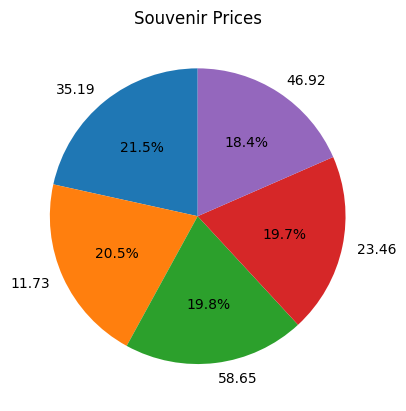

In [233]:
plt.pie(dfprices_Souvenirs['count'], labels=dfprices_Souvenirs['price'], autopct='%1.1f%%', startangle=90)

plt.title('Souvenir Prices')
plt.show()

Conclusions:
<br> - The nature of each product is not described in the dataset, as such, prices is the only way to discern them
<br> - Price itself does not seem to greatly influence the customer decision within a category, since: (a) The highest sought after product on each category is not always the most expensive nor the cheapest. (b) The percentage for all products is 20%+-2%, with most product sitting close to 20% 


## Popular categories

### Transaction Count

In [234]:
df4 = df2.groupby('category').size().reset_index(name='count')
df4.sort_values(by='count', ascending=False, inplace=True)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 1 to 0
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  8 non-null      object
 1   count     8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


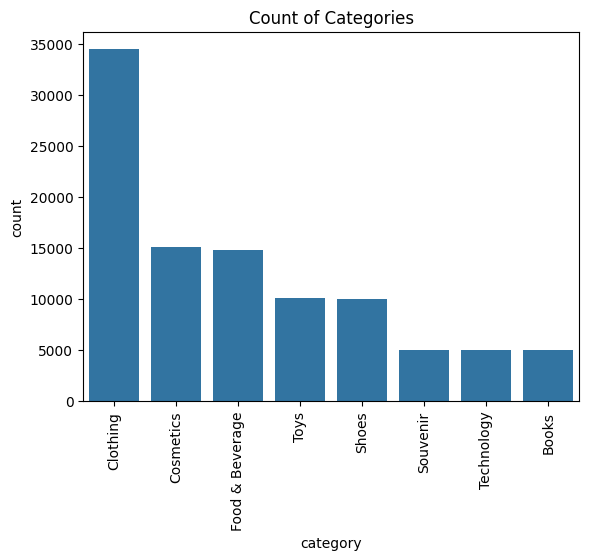

In [235]:
sns.barplot(x='category', y= 'count', data=df4)
plt.title('Count of Categories')
plt.xticks(rotation=90)
plt.show()

### Total expent

In [236]:
df5 = df2.groupby('category')['TotalPrice'].sum().reset_index()
df5['TotalPrice'] = round(df5['TotalPrice'] / 1e6, 2)  # Convert to millions
df5 = df5.rename(columns={'category': 'Category', 'TotalPrice': 'Total Price (Million TL)'})
df5.sort_values(by='Total Price (Million TL)', ascending=False, inplace=True)
df5

,Category,Total Price (Million TL)
1,Clothing,114.00
4,Shoes,66.55
6,Technology,57.86
2,Cosmetics,6.79
7,Toys,3.98
3,Food & Beverage,0.85
0,Books,0.83
5,Souvenir,0.64


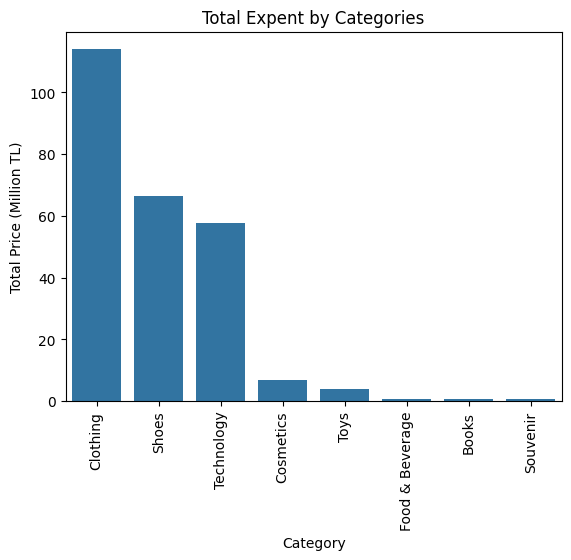

In [237]:
sns.barplot(x='Category', y= 'Total Price (Million TL)', data=df9)
plt.title('Total Expent by Categories')
plt.xticks(rotation=90)
plt.show()

Conclusions:
<br> - Clothing is the most sought after and expent on category with almost 35000 purchases and 114M TL expent
<br> - Though shoes and technology are not as bought as other categories, the have the second and third most expent on, probably due to their higher prices (see plots of prices)
<br> - Cosmetics, foods and toys have average to high number of purchases but low totals expent due to lower prices
<br> - Souvenirs and books have low buy rates and total expent per customers